In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import draw
from skimage import io
from skimage.util import crop

In [29]:
random.seed(42)

In [30]:
img = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG')

io.imsave('../images/reference_image.jpg',img)

In [31]:
height, width, _ = img.shape
R = 100 # Radius
previous_heights = []
previous_widths = []

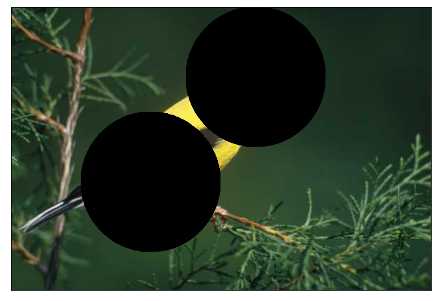

In [48]:
# Classified as "loudspeaker"
mask1 = draw.circle(100, 350, R)
mask2 = draw.circle(250, 200, R)

fig, ax = plt.subplots()
ax.imshow(img)
ax.plot(mask1[1], mask1[0], 'black', lw=1)
ax.plot(mask2[1], mask2[0], 'black', lw=1)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

fig.tight_layout(pad=0.05)
plt.savefig(f'../images/test_mask_custom.jpg')
plt.show()

In [ ]:
# Steps
# * Crop seperate elements of image and black of surrounding, save orignal coords
# * Create black canvas of same size of original image
# * Add cropped elements to canvas

In [55]:
img.shape

(405, 600, 3)

In [62]:
img[404][599]

array([21, 38, 28], dtype=uint8)

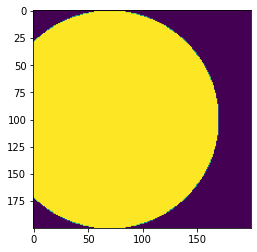

In [85]:
image = np.random.random((200, 200))
# image = np.random.random((200, 200, 3))

# --- coordinate specification

r0, c0 = 100, 70  # circle center (row, column)
R = 100  # circle radius

theta0 = np.deg2rad(20)  # angle #1 for arc
theta1 = np.deg2rad(40)  # angle #2 for arc

# Above, I provide two angles, but you can also just give the two
# coordinates below directly

r1, c1 = r0 - 1.5 * R * np.sin(theta0), c0 + 1.5 * R * np.cos(theta0)  # arc coord #1
r2, c2 = r0 - 1.5 * R * np.sin(theta1), c0 + 1.5 * R * np.cos(theta1)  # arc coord #2

# --- mask calculation

mask_circle = np.zeros(image.shape, dtype=bool)
mask_poly = np.zeros(image.shape[:2], dtype=bool)

rr, cc = draw.circle(r0, c0, R, shape=mask_circle.shape)
mask_circle[rr, cc] = 1
# mask_circle[rr, cc][0] = 1
# mask_circle[rr, cc][1] = 0
# mask_circle[rr, cc][2] = 0

# rr, cc = draw.polygon([r0, r1, r2, r0],
#                       [c0, c1, c2, c0], shape=mask_poly.shape)
# mask_poly[rr, cc] = 1

# mask = mask_circle & mask_poly
# mask = mask_poly
mask = mask_circle

plt.imshow(mask)
plt.show()

In [75]:
np.random.random((200, 200,3))[100, 100]

array([0.57228797, 0.58581307, 0.46711833])

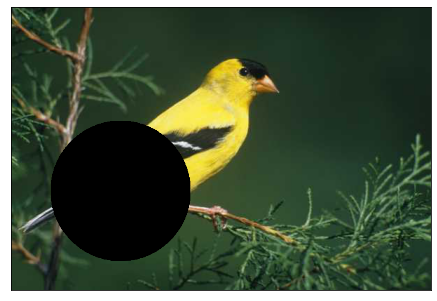

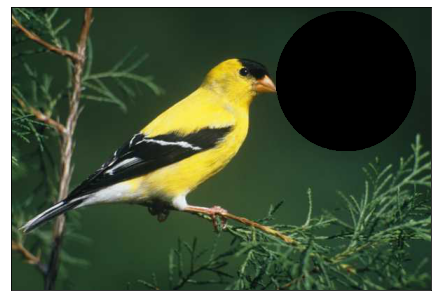

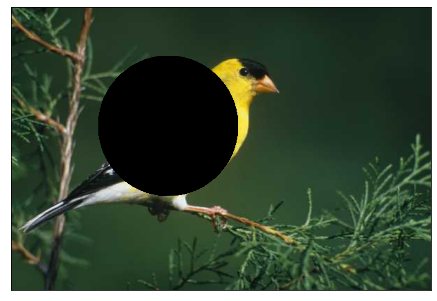

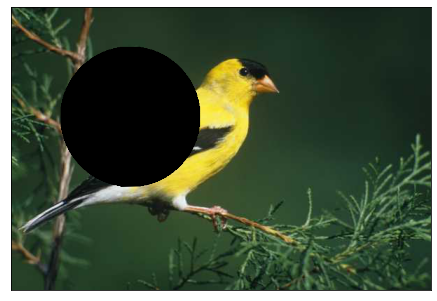

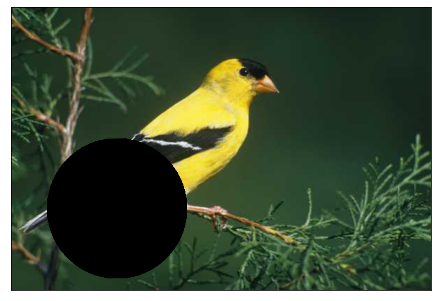

In [32]:
def get_mask_coords():
    
    mask_height = random.randint(R,height-R)
    mask_width = random.randint(R,width-R)

    if mask_height in previous_heights or mask_width in previous_widths:
        get_mask_coords()
    else:
        previous_heights.append(previous_heights)
        previous_widths.append(mask_width)
        return mask_height, mask_width

for i in range(1000):
    try:
        mask_height, mask_width = get_mask_coords()
    except TypeError:
        break

    mask = draw.circle(mask_height, mask_width, R)

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.plot(mask[1], mask[0], 'black', lw=1)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])

    fig.tight_layout(pad=0.05)
    plt.savefig(f'../images/test_mask_{i}.jpg')
    plt.show()